In [2]:
import numpy as np

import os
import mccd
from astropy.io import fits
import galsim as gs
import mccd.mccd_utils as mccd_utils
import mccd.utils as utils
import scipy as sp

import gc
from configparser import ConfigParser


import random

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Defining utility functions

In [3]:
loc2glob = mccd.mccd_utils.Loc2Glob()

plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)

plot_style = {
                'figure.figsize': (6,6),
                'figure.dpi': 100,
                'figure.autolayout':True,
                'lines.linewidth': 4,
                'lines.linestyle': '-',
                'lines.marker': 'o',
                'lines.markersize': 10,
                'legend.fontsize': 20,
                'legend.loc': 'best',
                'axes.titlesize': 24,
                'axes.grid': False,
                'axes.grid.which': 'major',
                'axes.grid.axis': 'both'}
mpl.rcParams.update(plot_style)

# Pre-defined colormap
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')


def plot_ccds_fun(positions,mom,title):
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot(111)
    for ccd_it in range(40):
        xs,ys = loc2glob.shift_coord(ccd_it)
        rect = mpl.patches.Rectangle((xs,ys),2048,4612,linewidth=1,edgecolor='r',facecolor='none')
        ax1.add_patch(rect)

    im1 = ax1.scatter(positions[:, 0], positions[:, 1], s=5,c=mom, marker='*', cmap=newcmp)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    ax1.set_xticks([]);ax1.set_yticks([])
    ax1.axis('off')
    ax1.set_title(title)
    plt.show()
    
map_e1 = np.load('../data/e1_psf.npy')

## Testing the MomentInterpolator function of the MCCD_utils

In [4]:
moment_interpolator = mccd.mccd_utils.MomentInterpolator(map_e1)


In [5]:
## Generate 2400 random local positions on 40 CCDs (60 per CCD), then converting them to global positions 
positions = np.zeros((2400,2))
ccd_list = np.zeros(2400)
for i in range (2400):
    ccd = np.floor((i/60))
    x = np.random.uniform(0,2048)
    y = np.random.uniform(0,4612)
    positions[i] = loc2glob.loc2glob_img_coord(ccd_n=ccd,x_coor=x,y_coor=y)
    ccd_list[i] = ccd

In [6]:
e1s = [(float(moment_interpolator.interpolate_position(positions[i][0], positions[i][1]))) for i in range (2400)]

## Check out the interpolated dataset

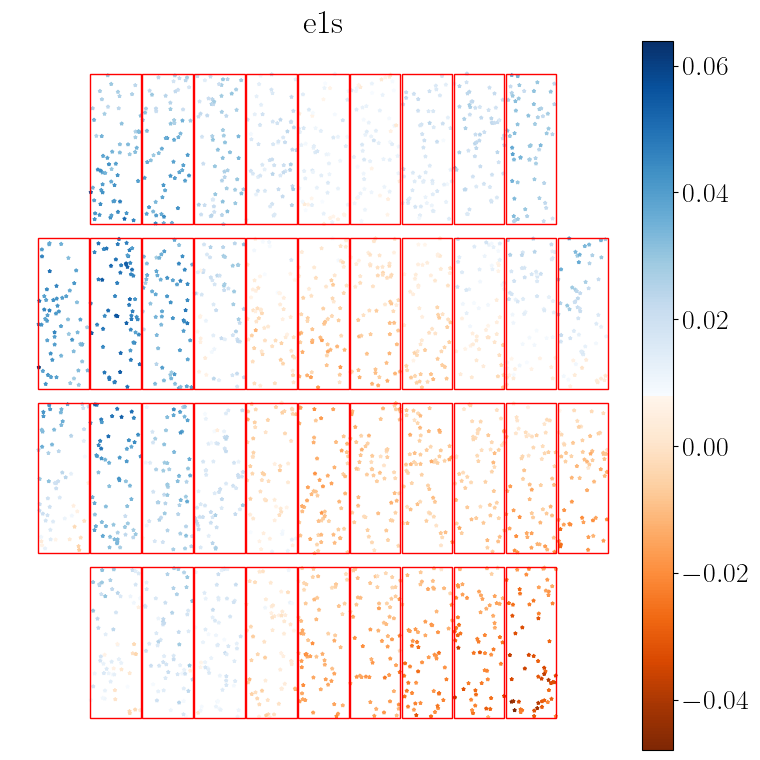

In [8]:
plot_ccds_fun(positions, e1s, 'e1s')